<a href="https://colab.research.google.com/github/Ahmad162539/ML-class-excercise-codes/blob/main/ML%20Class%20horse%20and%20human%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip -O /home/horse_human.zip
!wget --no-check-certificate \
https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip -O /home/validation_horse_human.zip

import os 
import zipfile

local_zip= '/home/horse_human.zip'
zip_ref= zipfile.ZipFile(local_zip, "r")
# zip_ref = zipfile.ZipFile(local_zip,"r")

zip_ref.extractall ("/home/horse_human")
#zip_ref.extractall("/home/horse_human")

local_zip= '/home/validation_horse_human.zip'

zip_ref= zipfile.ZipFile (local_zip, "r")
#zip_ref = zipfile.ZipFile(local_zip, "r")

zip_ref.extractall ("/home/validation_horse_human")
#zip_ref.extractall("/home/validation_horse_human")

zip_ref.close()
#zip_ref.close()

--2023-05-23 05:56:50--  https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/home/horse_human.zip’

/home/horse_human.z 100%[===================>] 142.65M  31.2MB/s    in 5.7s    

2023-05-23 05:56:56 (24.9 MB/s) - ‘/home/horse_human.zip’ saved [149574867/149574867]

--2023-05-23 05:56:56--  https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator (rescale = 1/255)
valid_datagen= ImageDataGenerator (rescale = 1/255)

train_datagenerator = train_datagen.flow_from_directory ("/home/horse_human", target_size= (150,150), batch_size= 128, class_mode = "binary")
valid_datagenerator = train_datagen.flow_from_directory ("/home/validation_horse_human", target_size= (150,150), batch_size= 128, class_mode = "binary")

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


500 images found in /home/horse_human/horses/


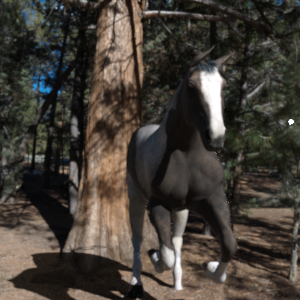

/home/horse_human/horses/horse23-6.png


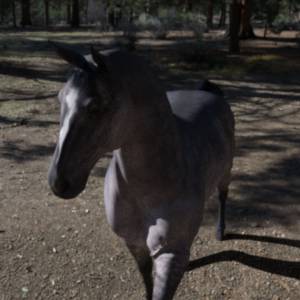

/home/horse_human/horses/horse42-8.png


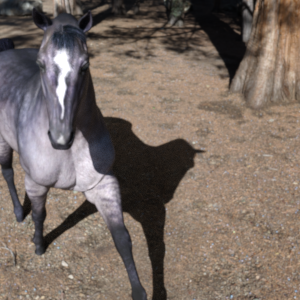

/home/horse_human/horses/horse43-5.png


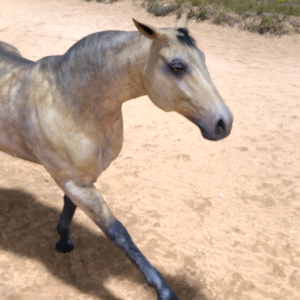

/home/horse_human/horses/horse38-5.png


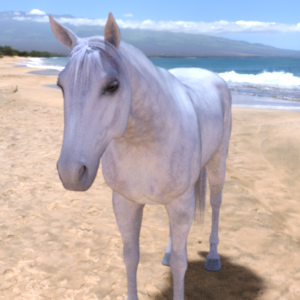

/home/horse_human/horses/horse28-2.png


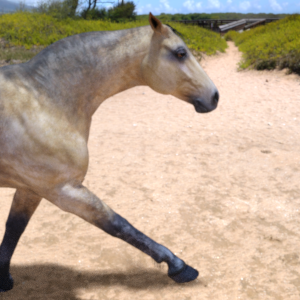

/home/horse_human/horses/horse38-4.png


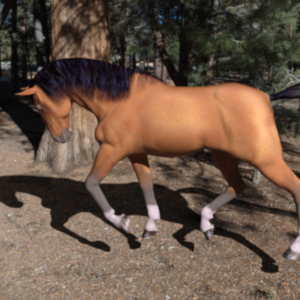

/home/horse_human/horses/horse49-9.png


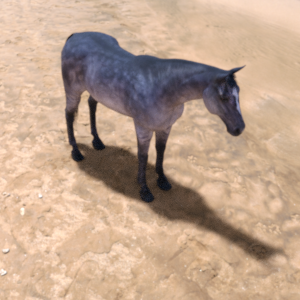

/home/horse_human/horses/horse29-5.png


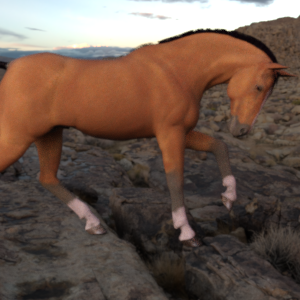

/home/horse_human/horses/horse12-5.png


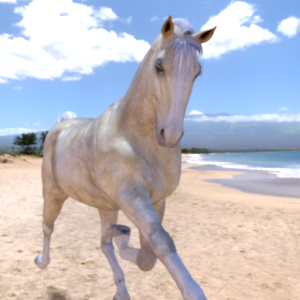

/home/horse_human/horses/horse07-3.png


In [14]:
from glob import glob 
from IPython.display import Image, display

dir_image = "/home/horse_human/horses/"
images = glob (dir_image + "*.png", recursive = False)

print (len(images), "images found in", dir_image)

for image in images [0:10]:
  display (Image(image))
  print (image)

527 images found in /home/horse_human/humans/


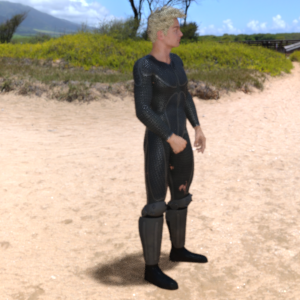

/home/horse_human/humans/human10-05.png


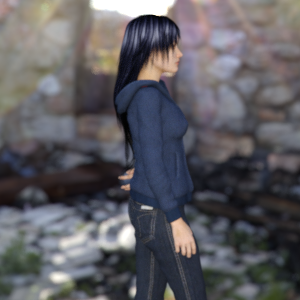

/home/horse_human/humans/human03-29.png


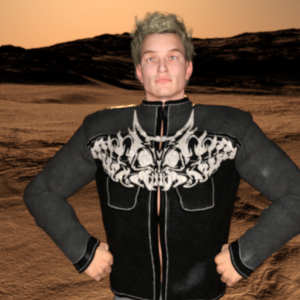

/home/horse_human/humans/human17-13.png


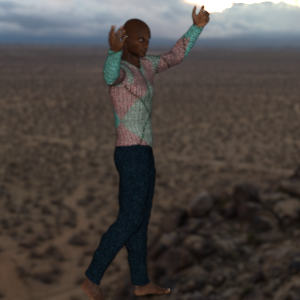

/home/horse_human/humans/human04-26.png


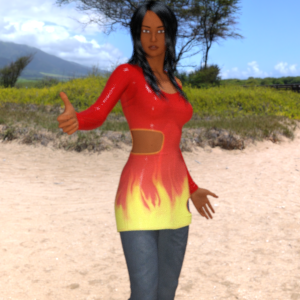

/home/horse_human/humans/human14-06.png


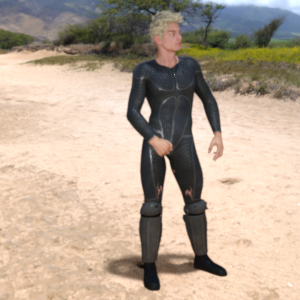

/home/horse_human/humans/human10-14.png


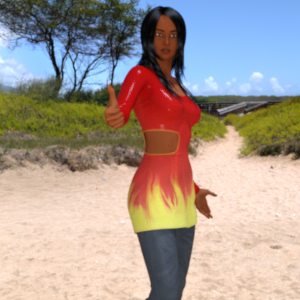

/home/horse_human/humans/human14-00.png


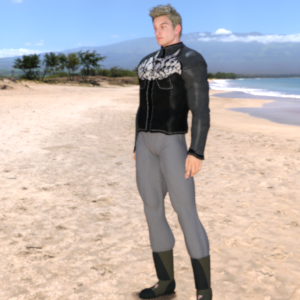

/home/horse_human/humans/human11-04.png


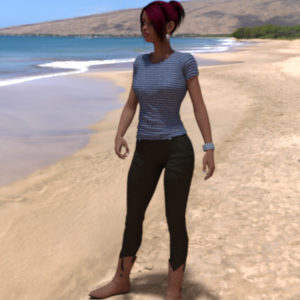

/home/horse_human/humans/human08-23.png


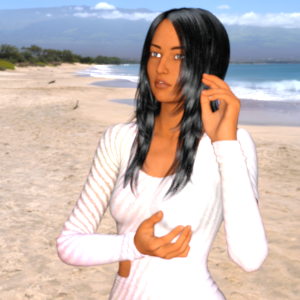

/home/horse_human/humans/human16-26.png


In [13]:
from glob import glob 
#from Ipython.display import Image, display
from IPython.display import Image, display


dir_image = "/home/horse_human/humans/"
images = glob (dir_image + "*.png", recursive = False)

print (len (images), "images found in", dir_image)

for image in images [0:10] :
  display (Image (image))
  print(image)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1 / 255)
valid_datagen = ImageDataGenerator(rescale = 1 / 255)

train_datagenerator = train_datagen.flow_from_directory ("/home/horse_human", target_size = (150, 150), batch_size = 128, class_mode = "binary")
valid_datagenerator = train_datagen.flow_from_directory ("/home/validation_horse_human", target_size = (150, 150), batch_size = 128, class_mode = "binary")


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential ( [
                                      tf.keras.layers.Conv2D (16,(3,3),activation= "relu", input_shape = (150, 150, 3) ),
                                      tf.keras.layers.MaxPool2D(2,2),
                                      tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64,(3,3), activation = "relu"),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Flatten (),
                                      tf.keras.layers.Dense(512, activation = "relu"),
                                      tf.keras.layers.Dense(1, activation = "sigmoid")
    
])

model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [32]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = "binary_crossentropy", optimizer= RMSprop (learning_rate=0.001), metrics = ["acc"])

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1 / 255)
valid_datagen = ImageDataGenerator(rescale = 1 / 255)

train_datagenerator = train_datagen.flow_from_directory ("/home/horse_human", target_size = (150, 150), batch_size = 128, class_mode = "binary")
valid_datagenerator = train_datagen.flow_from_directory ("/home/validation_horse_human", target_size = (150, 150), batch_size = 128, class_mode = "binary")


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [46]:
history = model.fit_generator(train_datagenerator, steps_per_epoch = 8, epochs = 30, verbose = 1)
history = model.fit_generator(train_datagenerator, steps_per_epoch = 8, epochs = 30, verbose = 1, validation_data = valid_datagenerator, validation_steps = 8)


<ipython-input-46-fc5cf7dc0038>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagenerator, steps_per_epoch = 8, epochs = 30, verbose = 1)


Epoch 1/30
8/8 [==============================] - 32s 4s/step - loss: 0.0244 - acc: 0.9911
Epoch 2/30
8/8 [==============================] - 31s 4s/step - loss: 0.0174 - acc: 0.9933
Epoch 3/30
8/8 [==============================] - 32s 4s/step - loss: 0.0164 - acc: 0.9932
Epoch 4/30
8/8 [==============================] - 29s 4s/step - loss: 0.0103 - acc: 0.9978
Epoch 5/30
8/8 [==============================] - 29s 3s/step - loss: 0.0125 - acc: 0.9978
Epoch 6/30
8/8 [==============================] - 30s 4s/step - loss: 0.3005 - acc: 0.9288
Epoch 7/30
8/8 [==============================] - 29s 4s/step - loss: 0.1986 - acc: 0.9488
Epoch 8/30
8/8 [==============================] - 32s 4s/step - loss: 0.0125 - acc: 0.9980
Epoch 9/30
8/8 [==============================] - 29s 3s/step - loss: 0.0099 - acc: 0.9978
Epoch 10/30
8/8 [==============================] - 30s 4s/step - loss: 0.0168 - acc: 0.9956
Epoch 11/30
8/8 [==============================] - 31s 4s/step - loss: 0.0061 - acc: 0.99

<ipython-input-46-fc5cf7dc0038>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagenerator, steps_per_epoch = 8, epochs = 30, verbose = 1, validation_data = valid_datagenerator, validation_steps = 8)


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 7.8197e-05 - acc: 1.0000

8/8 [==============================] - 32s 4s/step - loss: 7.8197e-05 - acc: 1.0000 - val_loss: 3.0983 - val_acc: 0.8398
Epoch 2/30
8/8 [==============================] - 29s 3s/step - loss: 8.6323e-05 - acc: 1.0000
Epoch 3/30
8/8 [==============================] - 30s 4s/step - loss: 8.3510e-05 - acc: 1.0000
Epoch 4/30
8/8 [==============================] - 29s 4s/step - loss: 0.0746 - acc: 0.9822
Epoch 5/30
8/8 [==============================] - 29s 4s/step - loss: 0.1075 - acc: 0.9911
Epoch 6/30
8/8 [==============================] - 30s 4s/step - loss: 0.0153 - acc: 0.9978
Epoch 7/30
8/8 [==============================] - 29s 3s/step - loss: 0.0058 - acc: 1.0000
Epoch 8/30
8/8 [==============================] - 31s 4s/step - loss: 0.0032 - acc: 1.0000
Epoch 9/30
8/8 [==============================] - 29s 4s/step - loss: 0.0021 - acc: 1.0000
Epoch 10/30
8/8 [==============================] - 29s 3s/step - loss: 0.0015 - acc: 1.0000
Epoch 11/30
8/8 [==============================] - 

In [56]:
import numpy as np 
from tensorflow.keras.preprocessing import image

def test_image (file_image) :
  img = image.load_img(file_image, target_size = (150,150))
  x= image.img_to_array (img)
  x = np.expand_dims (x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print (classes [0])
  if classes [0]>0.5 :
    print("a human")
  else: 
    print(" a horse")


!wget "https://thehorse.com/wp-content/uploads/2017/01/iStock-510488648.jpg"-0/home/test_image2.jpg

file_image = "/home/test_image2.jpg"
display(Image(file_image))
test_image(file_image)

--2023-05-23 09:05:21--  https://thehorse.com/wp-content/uploads/2017/01/iStock-510488648.jpg-0/home/test_image2.jpg
Resolving thehorse.com (thehorse.com)... 162.159.135.42
Connecting to thehorse.com (thehorse.com)|162.159.135.42|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-05-23 09:05:22 ERROR 404: Not Found.



FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

FileNotFoundError: ignored